# Implementación de word2vec

Procesando tema: SustainableFinance


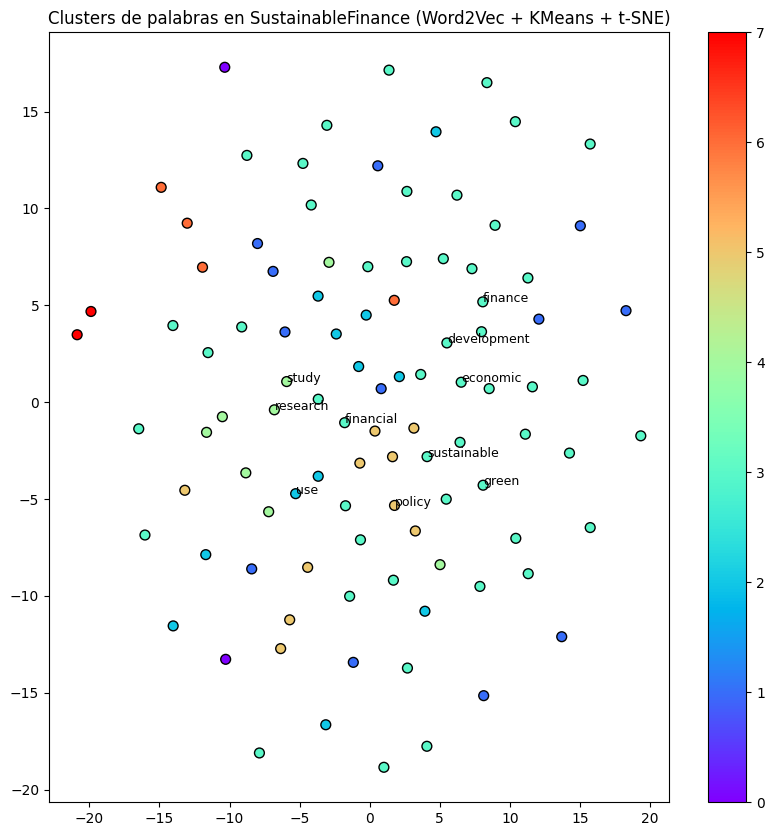

Procesando tema: CorporateFinance


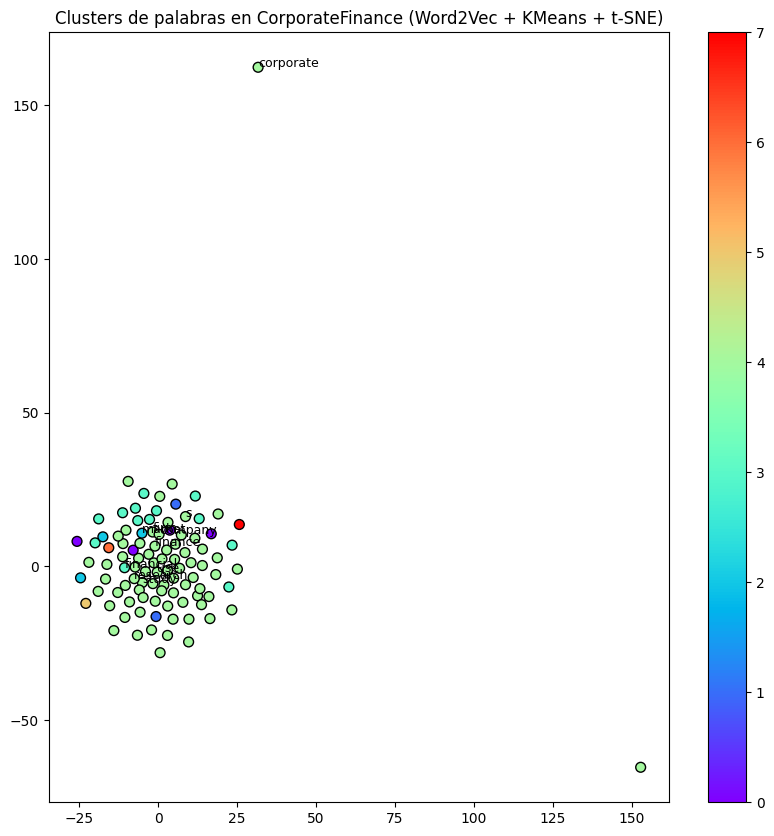

Procesando tema: AssetPricingModels


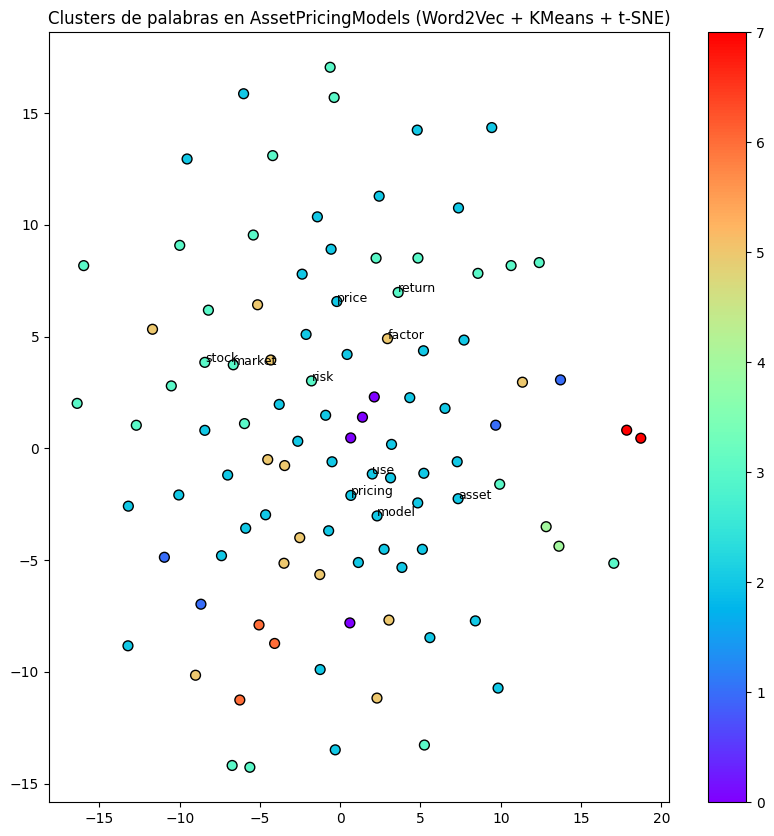

Procesando tema: BehavioralFinance


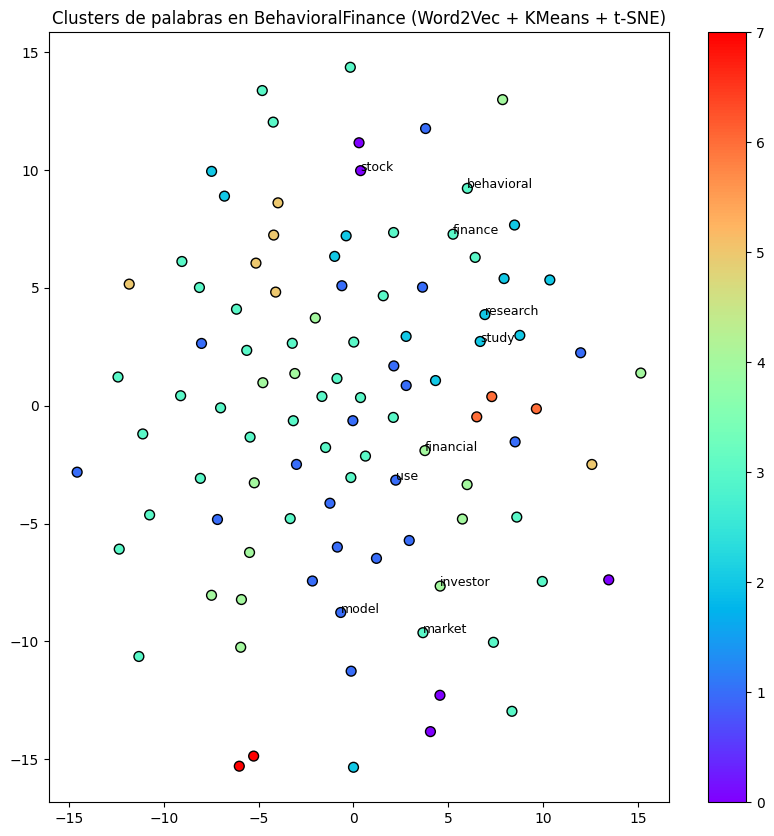

Procesando tema: FinancialDerivatives


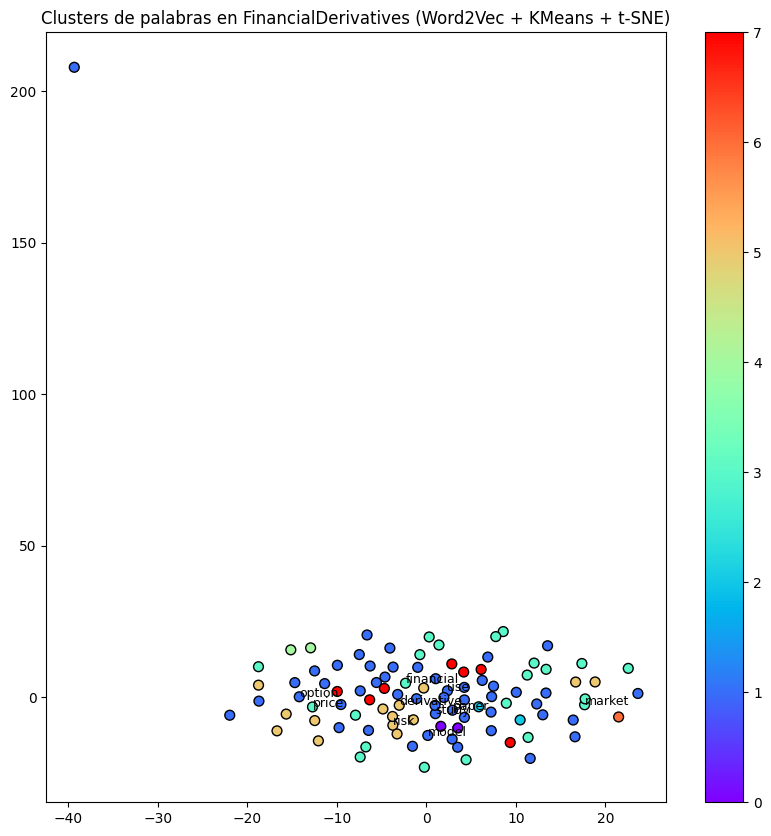

Procesando tema: FinancialEngineering


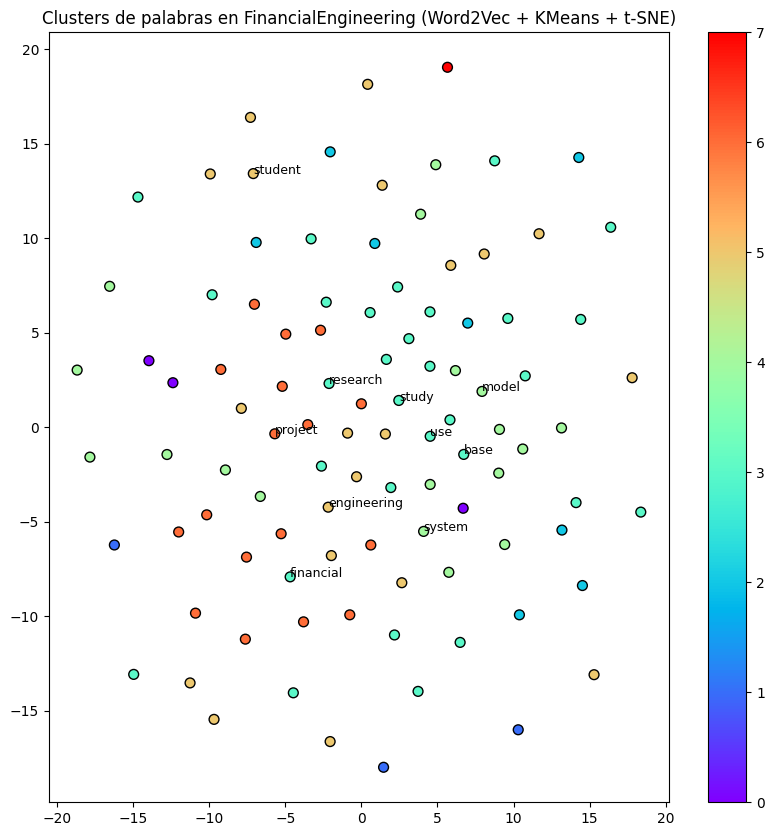

Procesando tema: FinancialRisk


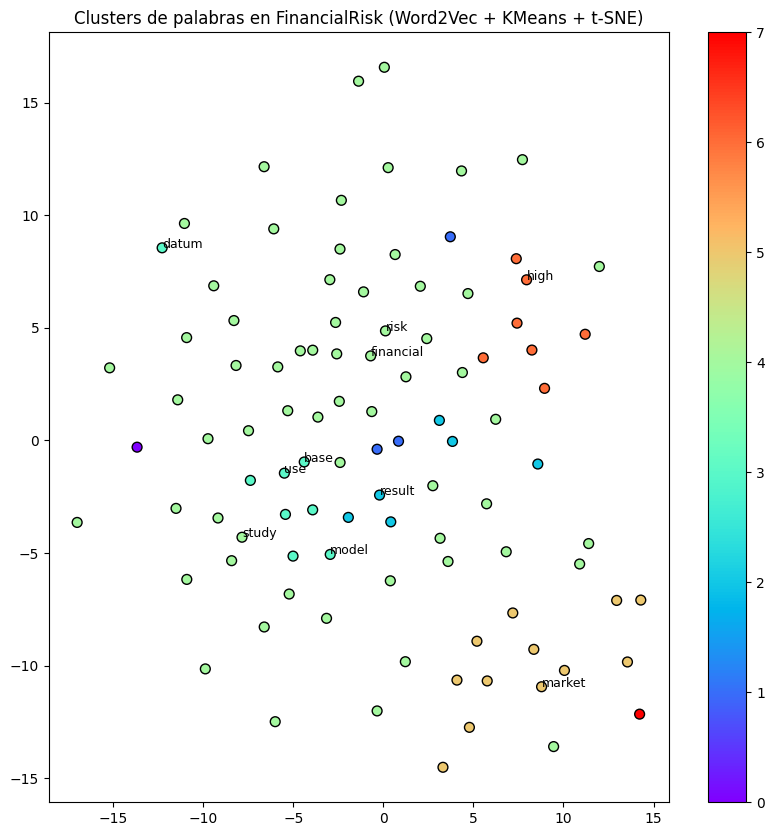

Procesando tema: PortfolioOptimization


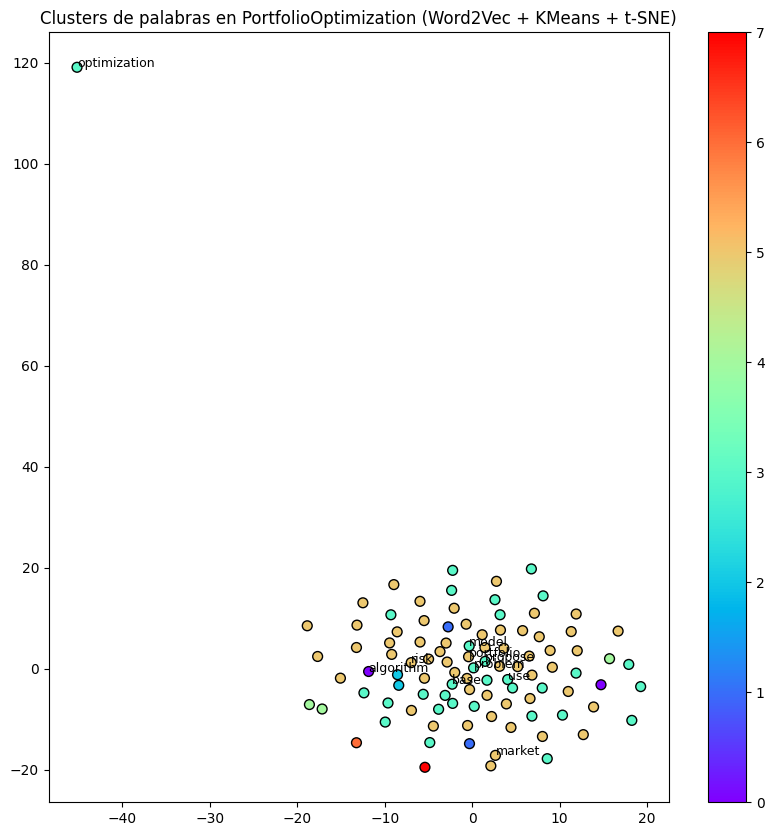

In [3]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el archivo preprocesado sin stopwords
df = pd.read_csv('cleared_abstracts.csv')

# Filtrar la columna de abstracts y temas
abstracts = df['Lemmas']
topics = df['Topic'].unique()

# 2. Definir la cantidad de palabras a mostrar en el gráfico
num_words_to_display = 100  # Ajusta este valor para controlar la cantidad de palabras

# 3. Recorrer cada tema y realizar el proceso por separado
for topic in topics:
    print(f"Procesando tema: {topic}")
    
    # Filtrar los abstracts por tema
    abstracts_by_topic = df[df['Topic'] == topic]['Lemmas']
    tokenized_abstracts = [abstract.split() for abstract in abstracts_by_topic]

    # 4. Entrenar el modelo Word2Vec para este tema
    model = Word2Vec(sentences=tokenized_abstracts, vector_size=100, window=5, min_count=2, sg=1, workers=4)
    
    # Obtener las palabras y vectores
    words = list(model.wv.index_to_key)

    # Limitar el número de palabras a mostrar
    words_to_display = words[:num_words_to_display]
    word_vectors = np.array([model.wv[word] for word in words_to_display])

    # 5. Aplicar KMeans para agrupar palabras en clusters (ajustar n_clusters si es necesario)
    n_clusters = 8  # Puedes cambiar este valor según el número de grupos esperados
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(word_vectors)

    # 6. Reducir la dimensionalidad con t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300)
    word_vecs_2d = tsne.fit_transform(word_vectors)

    # 7. Visualización de los clusters
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], c=clusters, cmap='rainbow', edgecolors='k', s=50)
    
    # Anotar algunas palabras clave en el gráfico (las más frecuentes, según el número limitado)
    for i, word in enumerate(words_to_display[:10]):  # Anota solo las primeras 50 palabras
        plt.annotate(word, xy=(word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=9)
    
    plt.title(f"Clusters de palabras en {topic} (Word2Vec + KMeans + t-SNE)")
    plt.colorbar(scatter)  # Agregar barra de color para los clusters
    plt.show()
